## Lead Scoring Case Study

## Approach
Based on the business problem and looking at the dataset at a high level, below steps will be followed to solve the case study problem :-

- Data Understanding and Inspection
- Data Cleaing
    - Missing Value check and Imputation
- EDA 
    - Univariate Analysis
    - Bivariate Analysis
    - Outlier Detection and Treatment
- Data Preparation
    - Dummy Variable Creation
    - Train Test Split
    - Feature Scaling
- Model Building on Training Data Set
    - Feature Selection by RFE
    - Multi Collinearity Validation and Removal
    - Confusion Matrix
- ROC Curve Analysis
- Finding Optimal cut off 
- Metrics Calculation
    - Precision and Recall trade off
    - Accuracy, Sensitivity, Specificity, TPR, FPR, F1_Score
- Model Prediction on Test Data Set
    - Metrics Validation (Accuracy, Sensitivity, Specificity, TPR, FPR, F1_Score, Precision, Recall)
- Final Analysis & Outcome
    - Lead Scoring
    - Train Vs Test Metrics
    - Classification Report
    - Top Predictors or Features
    - Top Predictors vs Relative Importance
- Conlclusion

In [1]:
import pandas as pd, numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data Understanding

In [3]:
# Importing dataset
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Importing data dictionary
lead_dict = pd.read_excel('Leads Data Dictionary.xlsx')
lead_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...
5,NaN,Lead Source,"The source of the lead. Includes Google, Organ..."
6,NaN,Do Not Email,An indicator variable selected by the customer...
7,NaN,Do Not Call,An indicator variable selected by the customer...
8,NaN,Converted,The target variable. Indicates whether a lead ...
9,NaN,TotalVisits,The total number of visits made by the custome...


In [5]:
pd.set_option('display.max_colwidth', -1)
lead_dict.drop('Unnamed: 0',inplace=True,axis=1)
lead_dict.columns = lead_dict.iloc[1]
lead_dict = lead_dict.iloc[2:]
lead_dict.reset_index(drop=True, inplace=True)
lead_dict.head(len(lead_dict))

1,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [6]:
lead_data.shape

(9240, 37)

**Insight** - There are total 9240 rows and 37 cols in the dataframe

## Data Duplicate Check

In [7]:
lead_dup = lead_data.copy()
lead_dup.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Checking for duplicates and dropping the entire duplicate row if any
lead_dup.drop_duplicates(subset=None, inplace=True)
lead_dup.shape

(9240, 37)

**Insight** - As the shape after executing the drop duplicate is same. Hence, we can conclude that there is zero duplicate values in the dataframe

## Data Inspection

In [9]:
lead_data.shape

(9240, 37)

In [10]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [11]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Insight** - As we observed from the info that there are multiple columns with missing values and from the statistical description that couple of variables have high data outliers. 

## Data Cleaning

As we can observe that there are select values for many column. This is because customer did not select any option from the list, hence it shows select. Select values are as good as NULL.  
Converting 'Select' values to NaN.

In [12]:
lead_data = lead_data.replace('Select', np.nan)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
# Missing Value check
lead_data.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article           

In [14]:
# percentage view of missing value
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper 

In [15]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
# we will drop the columns having more than 40% of missing values.
lead_data = lead_data.drop(lead_data.loc[:,list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)>=40)].columns, 1)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [17]:
len(lead_data.columns)

30

In [18]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                      0.00 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Lead Source                                      0.39 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
TotalVisits                                      1.48 
Total Time Spent on Website                      0.00 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                           0.00 
Magazine                                         0.00 
Newspaper Article                                0.00 
X Educatio

In [19]:
#dropping Lead Number and Prospect ID since they have all unique values
lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [20]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


### Missing Value Treatment

In [21]:
# checking value counts of city columns
lead_data.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [22]:
# checking value counts of specialization columns
lead_data.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

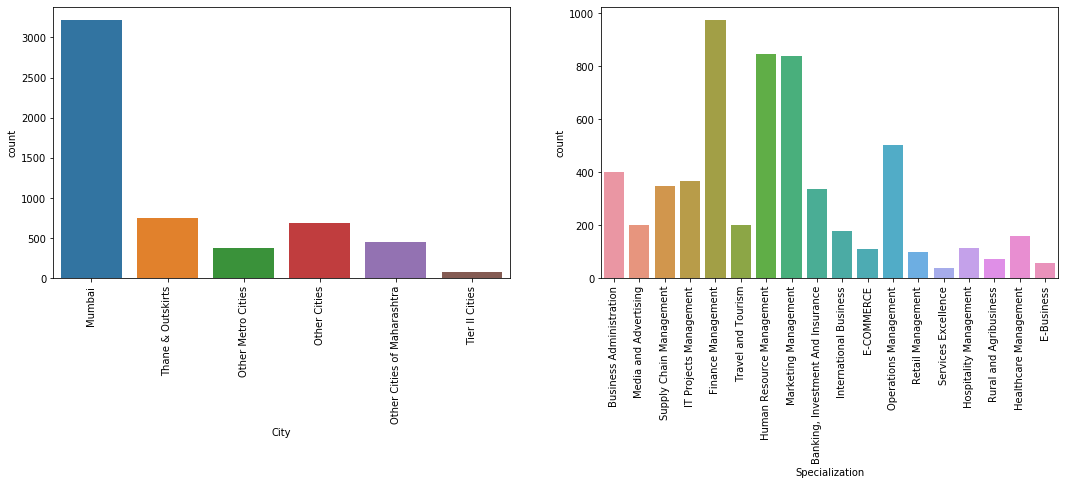

In [23]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(lead_data['City'])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation = 90)
plt.show()

**Insight** - 
- As 57.8% of the data has City = Mumbai. So, imputing missing value with the mode value
- As not selecting a Specialization could mean that lead do not have any specialization or a student. So we will categorise them into a derived category 'Others'.

In [24]:
lead_data['City'] = lead_data['City'].replace(np.nan, 'Mumbai')
lead_data.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [25]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')
lead_data.Specialization.value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [26]:
# checking value counts of What matters most to you in choosing a course columns
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [27]:
# checking value counts of What is your current occupation columns
lead_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

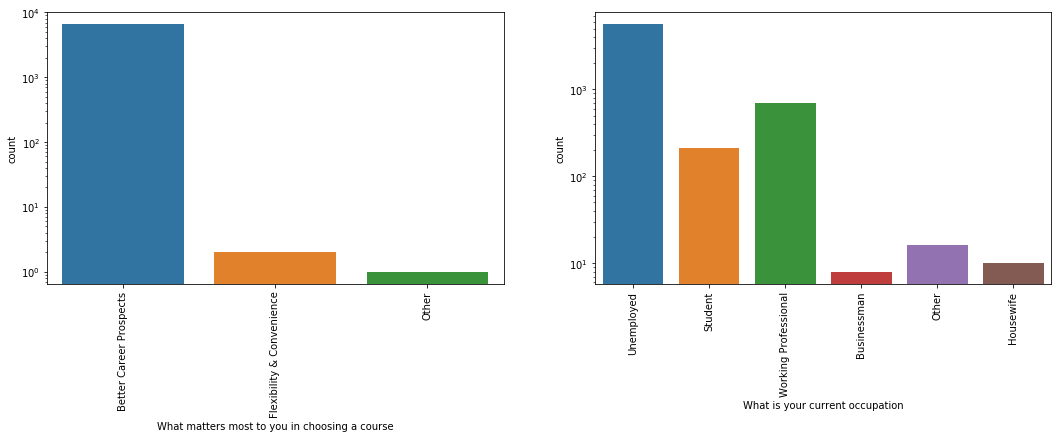

In [28]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.subplot(1,2,2)
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

**Insight** - 
- As 99% of the data has 'Better Career Prospect'. So, imputing missing value with the mode value
- As 85% of the data has status 'Unemployed'. So, imputing missing value with the mode value

In [29]:
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')
lead_data['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: What is your current occupation, dtype: int64

In [30]:
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience    2   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
# Checking value counts of country
lead_data.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Germany                 0.000590
Canada                  0.000590
Nigeria                 0.000590
Kuwait                  0.000590
South Africa            0.000590
Sweden                  0.000443
Asia/Pacific Region     0.000295
Ghana                   0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
China                   0.000295
Uganda                  0.000295
Philippines             0.000295
Switzerland             0.000148
Kenya                   0.000148
Denmark   

In [32]:
lead_data.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

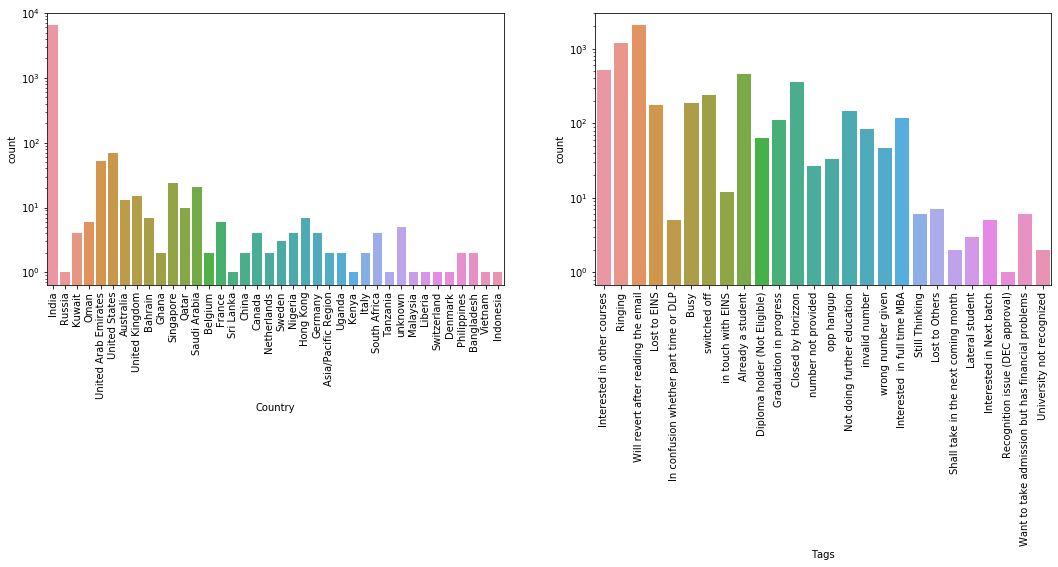

In [33]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(lead_data['Country'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.subplot(1,2,2)
sns.countplot(lead_data['Tags'])
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

In [34]:
# As we can clearly see 95% of the data has country = India, so imputing missing values with the Mode
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')
lead_data.Country.value_counts()

India                   8953
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Bahrain                 7   
Hong Kong               7   
France                  6   
Oman                    6   
unknown                 5   
Germany                 4   
Canada                  4   
Nigeria                 4   
Kuwait                  4   
South Africa            4   
Sweden                  3   
Asia/Pacific Region     2   
Ghana                   2   
Bangladesh              2   
Italy                   2   
Belgium                 2   
Netherlands             2   
China                   2   
Uganda                  2   
Philippines             2   
Switzerland             1   
Kenya                   1   
Denmark                 1   
Liberia                 1   
Sri Lanka               1   
Indonesia               1   
Tanzania      

In [35]:
# Imputing missing values with Others, as it is generally Unknown sources
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Others')
lead_data.Tags.value_counts()

Others                                               3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                          513 
Already a student                                    465 
Closed by Horizzon                                   358 
switched off                                         240 
Busy                                                 186 
Lost to EINS                                         175 
Not doing further education                          145 
Interested  in full time MBA                         117 
Graduation in progress                               111 
invalid number                                       83  
Diploma holder (Not Eligible)                        63  
wrong number given                                   47  
opp hangup                                           33  
number not provided                                  27  
in touch with 

In [36]:
# checking null information again
lead_data.isnull().sum()

Lead Origin                                      0  
Lead Source                                      36 
Do Not Email                                     0  
Do Not Call                                      0  
Converted                                        0  
TotalVisits                                      137
Total Time Spent on Website                      0  
Page Views Per Visit                             137
Last Activity                                    103
Country                                          0  
Specialization                                   0  
What is your current occupation                  0  
What matters most to you in choosing a course    0  
Search                                           0  
Magazine                                         0  
Newspaper Article                                0  
X Education Forums                               0  
Newspaper                                        0  
Digital Advertisement                         

In [37]:
# checking null percentage information again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [38]:
# Rest missing values are <= 1.5% so we can drop such rows
lead_data.dropna(inplace = True)

In [39]:
lead_data.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [40]:
len(lead_data)* 100 / len(lead_dup)

98.2034632034632

**Insight** - After performing all data cleaning and missing values imputation we still have 98.2% original rows available for EDA, which is indeed a satisfactory number to assure that there is no major loss of data during missing value treatment

In [41]:
# current shape
lead_data.shape

(9074, 28)

## EDA (Univariate/Bivariate Analysis)

Our target variable is converted that indicates whether a lead has been successfully converted = 1 or not = 0

In [42]:
# converting the variable into 1 (yes) and 0 (No)
round((sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100,2)

37.86

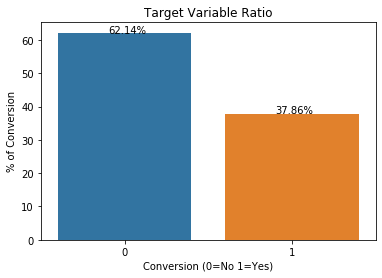

In [43]:
# Converted Data Imbalance plot

ax = sns.barplot(x='Converted', y='Converted', data=lead_data, estimator=lambda x: len(x) / len(lead_data) * 100)
ax.set(ylabel='Percent')
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.ylabel('% of Conversion')
plt.show()

**Insight** - Our Target variable is having a 62:38 ratio and seems to be properly balanced with respect to the conversion ratio. In short, we have 37.86 % of conversion in the available dataset.

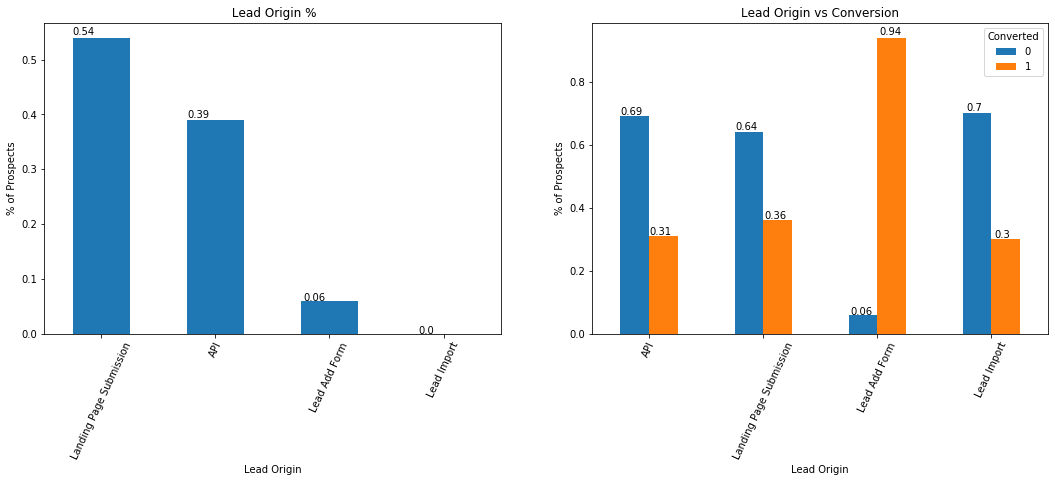

In [44]:
# Plotting w.r.t lead origin vs target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(lead_data['Lead Origin'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight** - 
- Univariate Analysis states that ~54% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API 
- Bivariate Analysis states that 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion but count of lead originated from them are considerable
- Lead Add Form has more than 90% conversion rate but count of lead are not very high
- Lead Import count is neglible in count  

**To improve overall lead conversion rate, we need to focus more on improving lead converion of 'API' and 'Landing Page Submission' origin and generate more leads from 'Lead Add Form'**

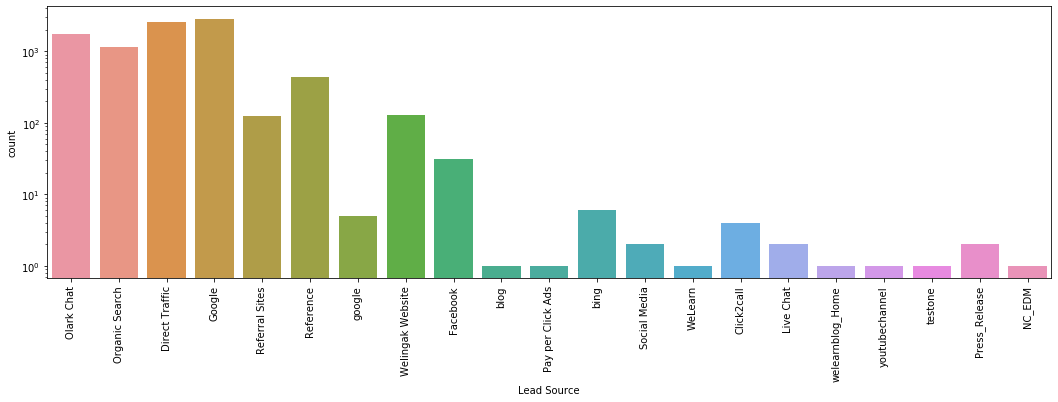

In [45]:
# Checking unique value counts of lead source
plt.figure(figsize=(18,5))
ax=sns.countplot(x = 'Lead Source', data = lead_data)
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [46]:
# Merging 2 Google into one category
lead_data['Lead Source'] = lead_data['Lead Source'].replace('google', 'Google')

# Imputing Null with Others, as it is generally Unknown sources
lead_data['Lead Source'] = lead_data['Lead Source'].replace(np.nan, 'Google')

# Merging low frequency items to Others
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 
                                                        'welearnblog_Home', 'WeLearn', 'blog', 'Pay per Click Ads',
                                                        'testone', 'NC_EDM', 'Live Chat', 'Social Media'], 'Others')

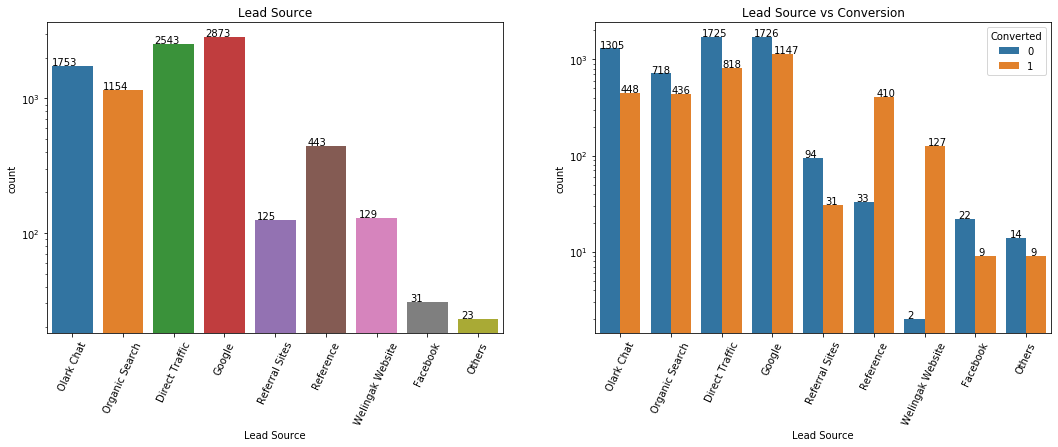

In [47]:
# Plotting lead source vs target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax=plt.subplot(221)
ax=sns.countplot(x = "Lead Source", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.title('Lead Source')

# Bivariate Analysis
ax=plt.subplot(222)
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.title('Lead Source vs Conversion')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight** 
- Univariate Analysis states that ~31% of the Lead Source is from 'Google' followed by ~28% from 'Direct Traffic' i.e. it generates max number of leads 
- Bivariate Analysis states that 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion where as conversion rate of reference leads and leads through welingak website is high  

**To improve overall lead conversion rate, we need to focus on improving lead converion of olark chat, organic search, direct traffic and google. And generate more leads from reference and welingak website.**

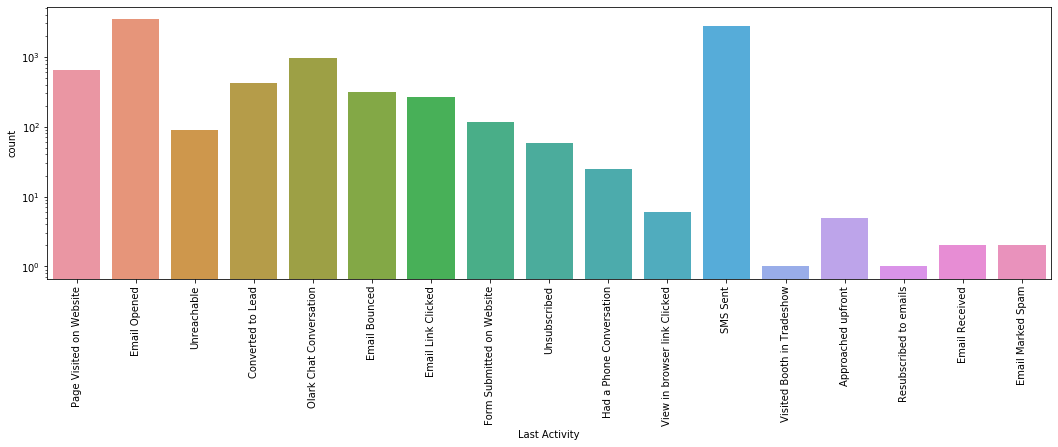

In [48]:
# Checking unique value counts of Last Activity
plt.figure(figsize=(18,5))
ax=sns.countplot(x = 'Last Activity', data = lead_data)
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [49]:
# Merging low frequency items to Others
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'Approached upfront',
                                                        'View in browser link Clicked','Email Received', 'Email Marked Spam',
                                                        'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Others')

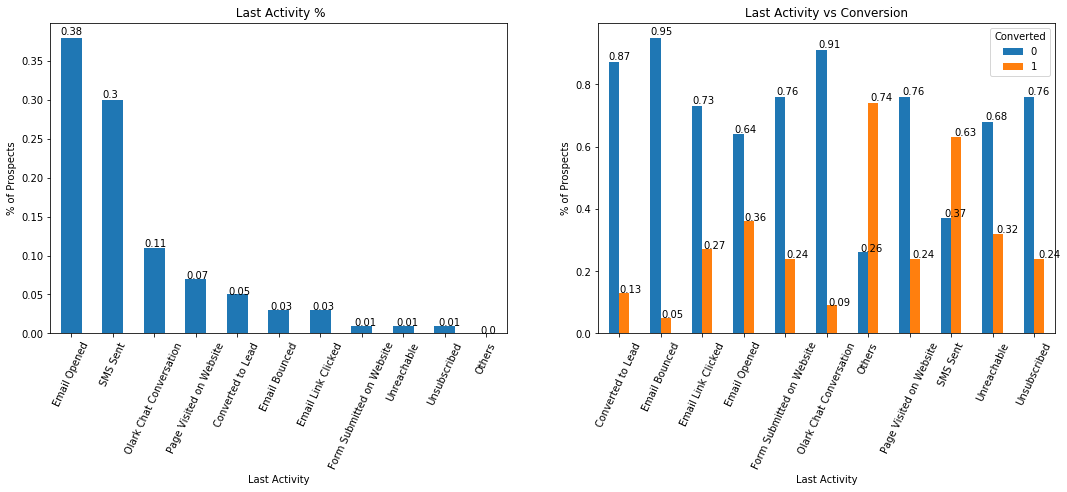

In [50]:
# Plot of last activity vs target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(lead_data['Last Activity'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight**
- Univariate Analysis states that ~38% of the Last Activity is from 'Email Opened' followed by ~30% from 'SMS Sent' 
- Bivariate Analysis states that 'Email Opened' as a Last Activity has 36% of Conversion and 'SMS Sent' has 63% of Conversion

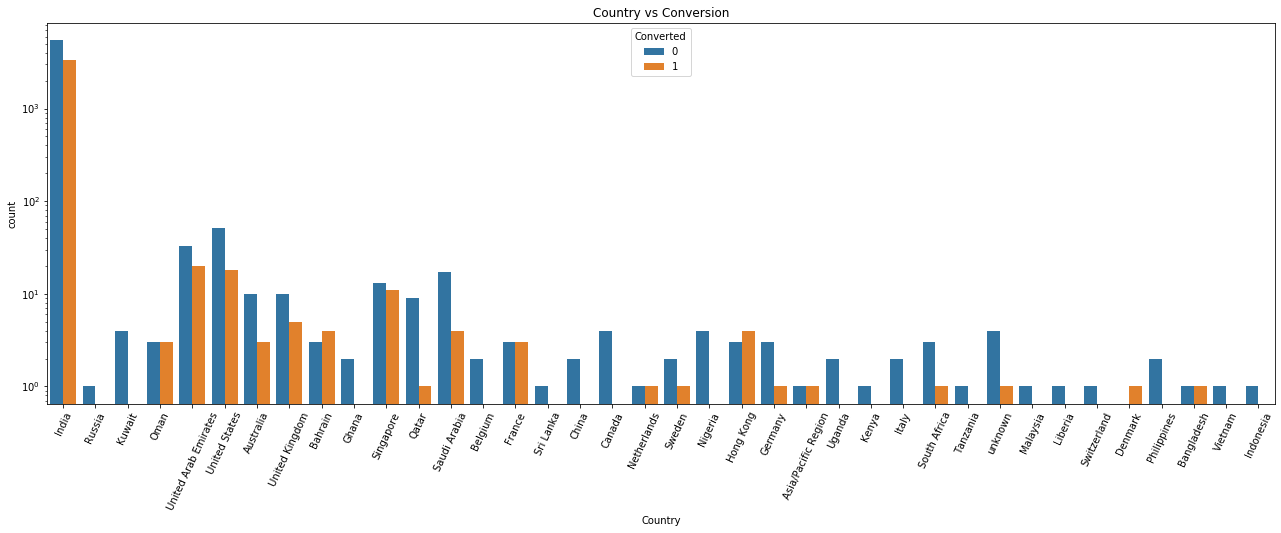

In [51]:
# Plot of country vs target variable

plt.figure(figsize=(22, 7))

# Bivariate Analysis
ax= sns.countplot(x = 'Country', hue = 'Converted', data = lead_data)
plt.xticks(rotation = 65)
plt.title('Country vs Conversion')
ax.set_yscale('log')
plt.show()

**Insight** 
- 99% of data is from 'India', we can say that core business is coming from India market
- Potential Country to make business from US, Middle East & Europe

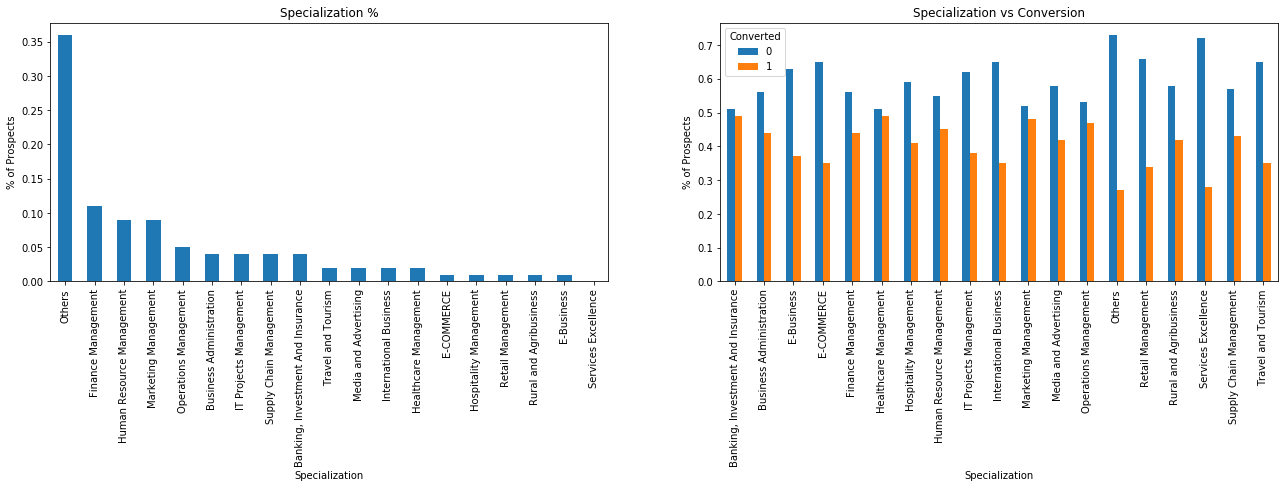

In [52]:
# Plot of Specialization vs target variable

plt.figure(figsize=(22,10))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(lead_data['Specialization'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight**
- Univariate Analysis states that ~40% of the Specialization is from 'Others' category, followed by ~10% from 'Finance Management' 
- Bivariate Analysis states that 'Finance Management' as a Specialization has 45% of Conversion and 'Human Resource Management' has 46% of Conversion

In [53]:
# Merging low frequency items to Others
lead_data['Tags'] = lead_data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

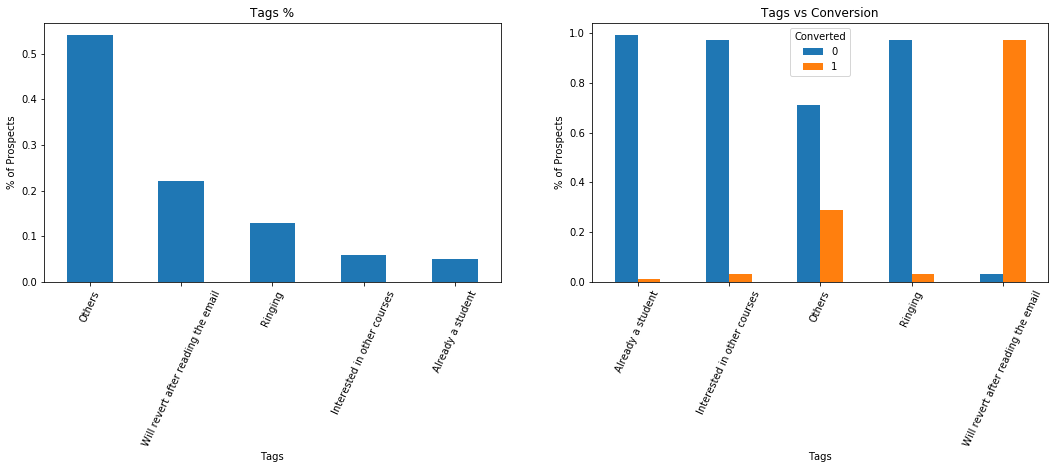

In [54]:
# plot tags vs target variable

plt.figure(figsize=(18, 10))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis
ax=plt.subplot(222)
round(pd.crosstab(lead_data['Tags'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

**Insight**
- Univariate Analysis states that ~54% of the Tags is from 'Others' category, followed by ~22% from 'Will revert after reading the email' 
- Bivariate Analysis states that 'Will revert after reading the email' as a Tags has 97% of Conversion and 'Others' has 30% of Conversion

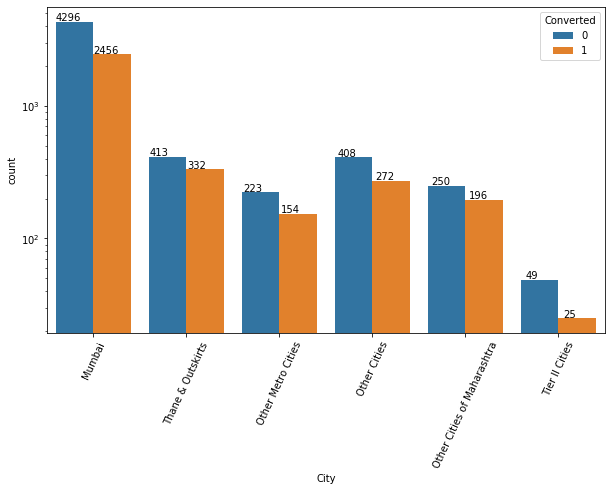

In [55]:
# plot city vs target variable

plt.figure(figsize = (10,6))
ax= sns.countplot(x = 'City', hue = 'Converted', data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.show()

**Insight**
- Bivariate Analysis states that 'Mumbai' as a City has 30% of Conversion 

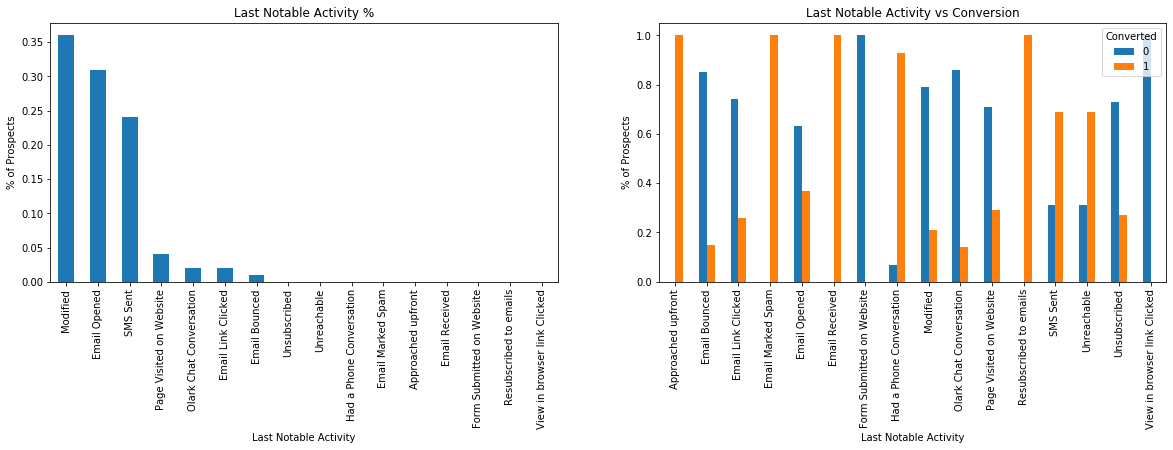

In [56]:
# plot last notable activity vs target variable
plt.figure(figsize=(20, 10))

# Univariate Analysis 
ax= plt.subplot(221)
round(lead_data['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis
ax=plt.subplot(222)
round(pd.crosstab(lead_data['Last Notable Activity'],lead_data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

'SMS Sent' is strong symbol for positive lead

### Outlier Analysis and Treatment

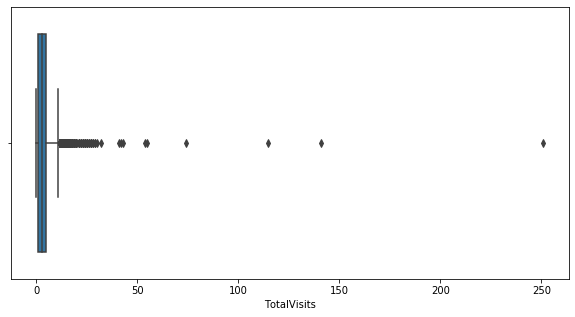

In [57]:
# plot total visits
plt.figure(figsize = (10,5))
sns.boxplot(lead_data['TotalVisits'])
plt.show()

In [58]:
# There are number of outliers in the data, We will cap the outliers to 95% value for analysis
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

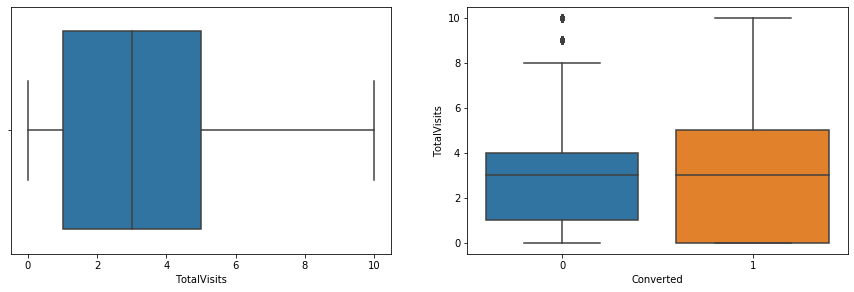

In [59]:
# plot total visits
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['TotalVisits'])
plt.subplot(222)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

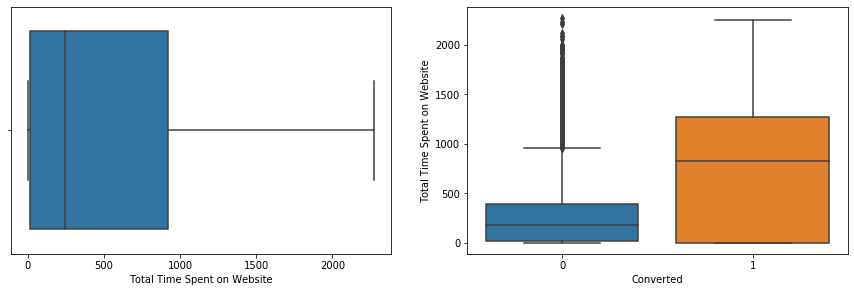

In [60]:
# plot Total Time Spent on Website
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.subplot(222)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

Leads spending more time on the weblise are more likely to be converted. Website should be made more engaging to make leads spend more time.

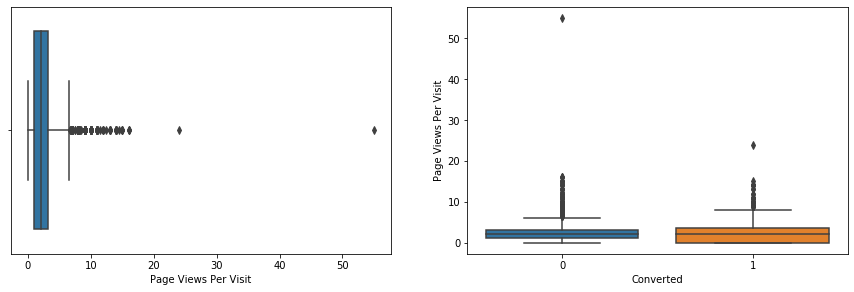

In [61]:
# plot Page Views Per Visit
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.subplot(222)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

In [62]:
# There are a number of outliers in the data, We will cap the outliers to 95% value for analysis
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

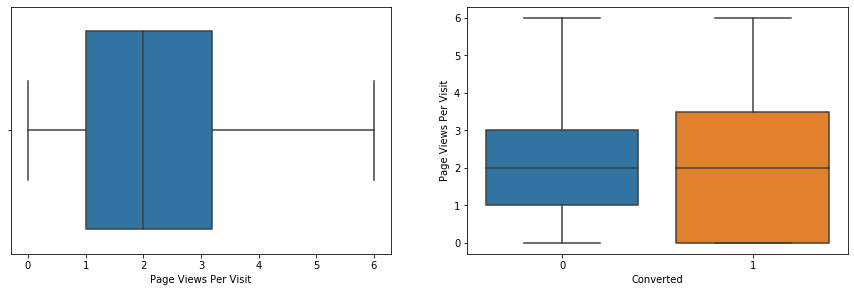

In [63]:
# plot Page Views Per Visit
plt.figure(figsize = (15,10))
plt.subplot(221)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.subplot(222)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

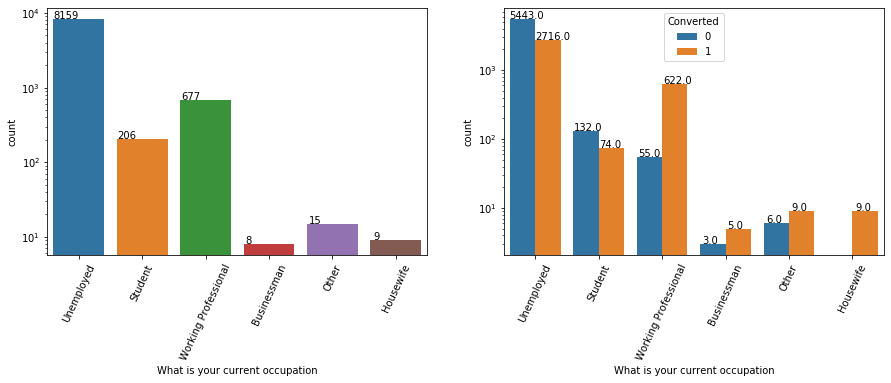

In [64]:
# plot of occupation vs target variable
plt.figure(figsize = (15,10))

# Univariate Analysis
plt.subplot(221)
ax= sns.countplot(x = "What is your current occupation", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')

# Bivariate Analysis
plt.subplot(222)
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 65)
ax.set_yscale('log')
plt.show()

**Insight** 
- Working Professionals going for the course have high chances of joining it
- Unemployed leads are the most in numbers but has around 30-35% conversion rate

#### Based on the EDA and data inspection we can say that there are columns  not adding any information to the model, hence we can drop them for further analysis

In [65]:
lead_data = lead_data.drop(['What matters most to you in choosing a course','Search', 'Magazine','Newspaper Article',
                    'X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations',
                    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                    'Get updates on DM Content','I agree to pay the amount through cheque',
                    'A free copy of Mastering The Interview','Country'],1)

In [66]:
lead_data.shape

(9074, 14)

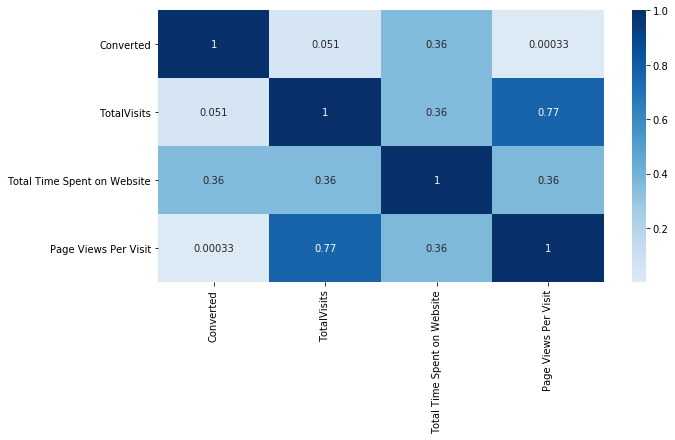

In [67]:
# exploring numerical variables and correlation check

plt.figure(figsize = (10,5))
sns.heatmap(lead_data.corr(), annot = True, cmap='Blues', center=0.423)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

**Insight** - Page Views Per Visit and Total Visits are highly correlated with correlation = 0.77

In [68]:
lead_data['Last Activity'].value_counts()

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation      972 
Page Visited on Website      640 
Converted to Lead            428 
Email Bounced                312 
Email Link Clicked           267 
Form Submitted on Website    116 
Unreachable                  90  
Unsubscribed                 59  
Others                       42  
Name: Last Activity, dtype: int64

In [69]:
lead_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website         318 
Olark Chat Conversation         183 
Email Link Clicked              173 
Email Bounced                   60  
Unsubscribed                    45  
Unreachable                     32  
Had a Phone Conversation        14  
Email Marked Spam               2   
Approached upfront              1   
Email Received                  1   
Form Submitted on Website       1   
Resubscribed to emails          1   
View in browser link Clicked    1   
Name: Last Notable Activity, dtype: int64

In [70]:
# Both the variables contains similar data. Hence, either of them can be dropped
lead_data.drop(['Last Notable Activity'], 1, inplace = True)

In [71]:
# checking percentage of data retained
round((100*lead_data.shape[0]/9240),2)

98.2

**Insight** - After all the process of data cleaning we managed to retain 98% of data which is really good for model building

In [72]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai


## Data Preparation

In [73]:
# Converting binary variable to 0/1

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the created list
lead_data[varlist] = lead_data[varlist].apply(binary_map)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai


### Dummy Variable Creation

In [74]:
# Creating Dummy, delete the first dummy and dropping the original
new_lead = pd.get_dummies(lead_data, drop_first=True)
new_lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [75]:
new_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 59 columns):
Do Not Email                                            9074 non-null int64
Do Not Call                                             9074 non-null int64
Converted                                               9074 non-null int64
TotalVisits                                             9074 non-null float64
Total Time Spent on Website                             9074 non-null int64
Page Views Per Visit                                    9074 non-null float64
Lead Origin_Landing Page Submission                     9074 non-null uint8
Lead Origin_Lead Add Form                               9074 non-null uint8
Lead Origin_Lead Import                                 9074 non-null uint8
Lead Source_Facebook                                    9074 non-null uint8
Lead Source_Google                                      9074 non-null uint8
Lead Source_Olark Chat                               

In [76]:
new_lead.shape

(9074, 59)

In [77]:
# Putting feature variable to X
X = new_lead.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [78]:
X.shape

(9074, 58)

In [79]:
# Putting response variable to y
y = new_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Test - Train Split

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=333)

In [81]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,4.0,346,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
8604,0,0,10.0,165,5.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2916,0,0,4.0,639,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
189,0,0,6.0,385,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3037,0,0,2.0,450,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [82]:
X_train.shape

(7259, 58)

In [83]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1461,0,0,5.0,71,5.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7926,0,0,4.0,233,1.33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1909,0,0,5.0,431,2.50,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
8971,0,0,4.0,1776,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5310,0,0,4.0,101,4.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [84]:
X_test.shape

(1815, 58)

In [85]:
y_train.shape

(7259,)

In [86]:
y_test.shape

(1815,)

### Feature Scaling - Numerical Variable

In [87]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.300780,-0.255196,0.976193,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
8604,0,0,2.467531,-0.587537,1.534715,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2916,0,0,0.300780,0.282792,0.976193,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
189,0,0,1.023031,-0.183587,2.093237,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3037,0,0,-0.421470,-0.064238,-0.140852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [88]:
## Checking the conversion Rate
sum(new_lead['Converted'])/len(new_lead['Converted'].index)*100

37.85541106458012

We have ~38% of conversion rate

### Correlation Check

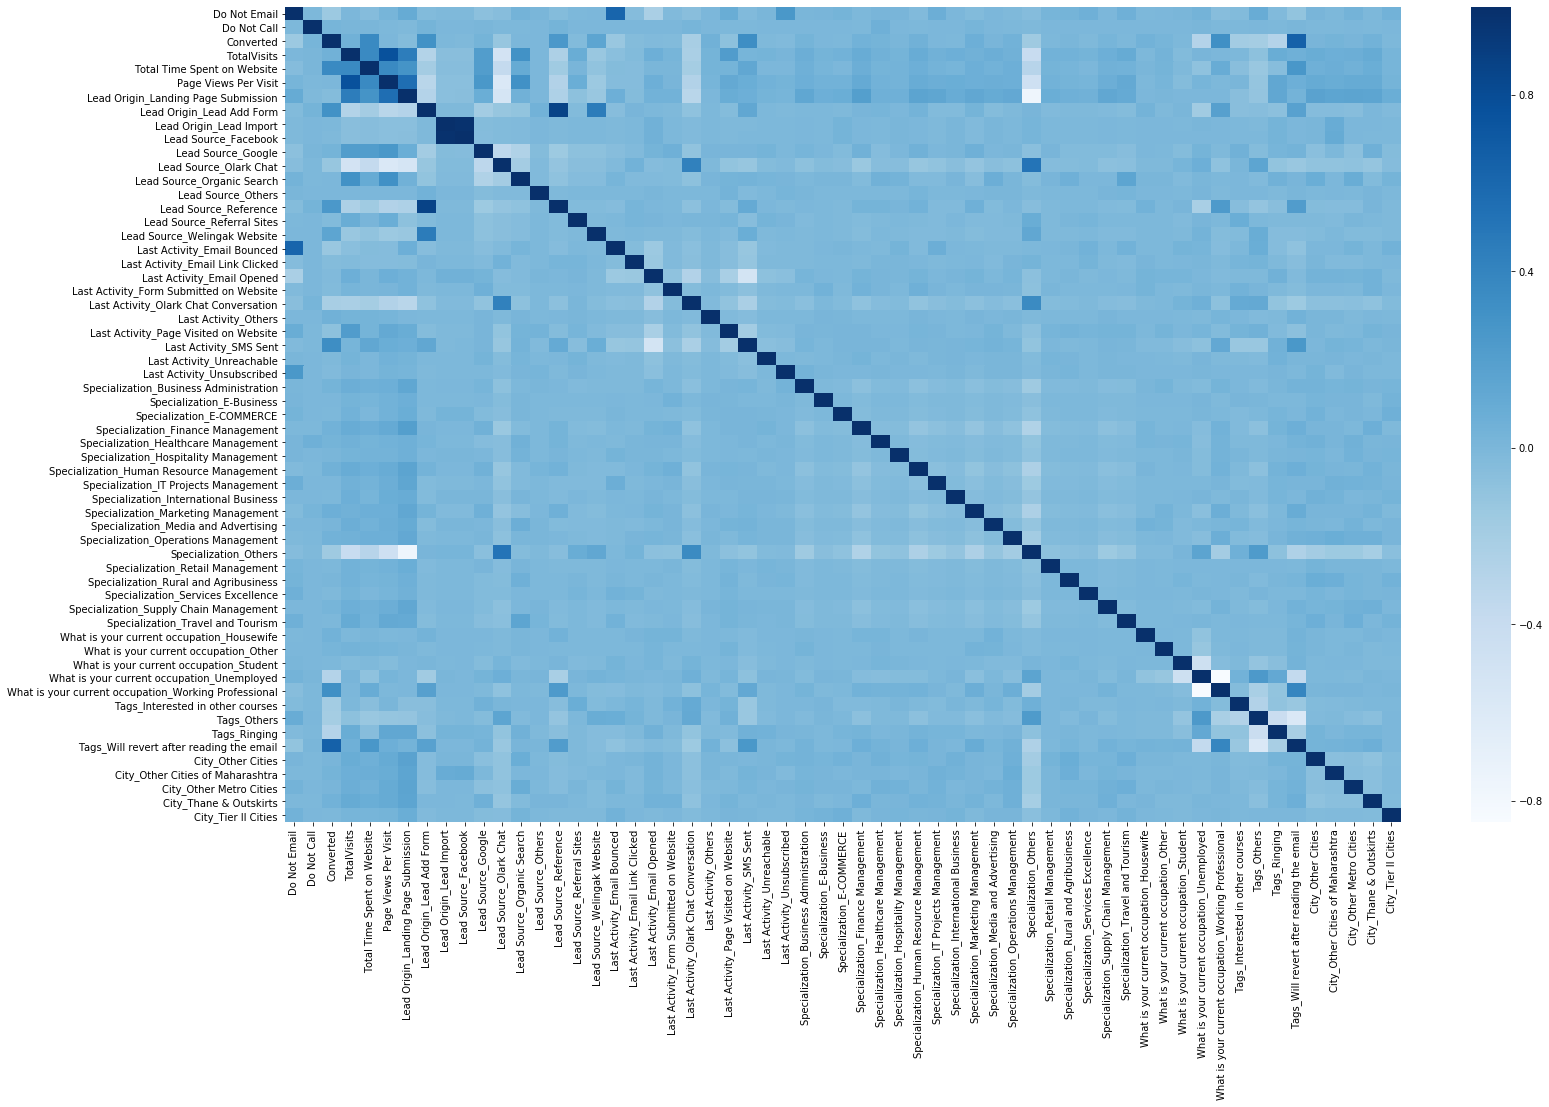

In [89]:
# plot correlation matrix 
plt.figure(figsize = (25,15))        
sns.heatmap(new_lead.corr(), cmap='Blues')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Model Building

### Model 1

In [90]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7200
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1812.7
Date:                Sun, 06 Dec 2020   Deviance:                       3625.4
Time:                        22:30:10   Pearson chi2:                 1.02e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3790      1.845     -2.916      0.004      -8.995      -1.764
Do Not Email                                            -1.2693      0.256     -4.955      0.000      -1.771      -0.767
Do Not Call                                             21.5088   2.45e+04      0.001      0.999   -4.81e+04    4.81e+04
TotalVisits                                              0.4899      0.067      7.325      0.000       0.359       0.621
Total Time Spent on Website                              1.1552      0.051     22.592      0.000       1.055       1.255
Page Views Per Visit                                    -0.4761      0.078     -6.075      0.000      -0.630      -0.322
Lead Origin_Landing Page Submission                     -0.4660      0.178     -2.614      0.009      -0.816      -0.117
Lead Origin_Lead Add Form                                0.3977      1.163      0.342      0.732      -1.882       2.678
Lead Origin_Lead Import                                 21.5241   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.3393   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.0993      0.124      0.804      0.422      -0.143       0.342
Lead Source_Olark Chat                                   1.1831      0.194      6.100      0.000       0.803       1.563
Lead Source_Organic Search                               0.0543      0.164      0.331      0.741      -0.267       0.376
Lead Source_Others                                       0.1633      0.922      0.177      0.859      -1.643       1.970
Lead Source_Reference                                    3.3784      1.200      2.816      0.005       1.027       5.730
Lead Source_Referral Sites                              -0.4955      0.444     -1.116      0.264      -1.366       0.375
Lead Source_Welingak Website                             6.2763      1.551      4.047      0.000       3.236       9.316
Last Activity_Email Bounced                              0.3889      0.512      0.760      0.447      -0.614       1.392
Last Activity_Email Link Clicked                         1.0186      0.353      2.887      0.004       0.327       1.710
Last Activity_Email Opened                               1.2606      0.273      4.619      0.000       0.726       1.796
Last Activity_Form Submitted on Website                  1.1577      0.447      2.589      0.010       0.281       2.034
Last Activity_Olark Chat Conversation                   -0.5495      0.327     -1.679      0.093      -1.191       0.092
Last Activity_Others                                     2

### Feature Selection By RFE

In [91]:
logreg = LogisticRegression()
# running RFE with 18 variables as output (~30% of total available features)
rfe = RFE(logreg, 18)             
rfe = rfe.fit(X_train, y_train)

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Others', False, 19),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 20),
 ('Last Activity_SMS Sent', True, 1),
 ('Last A

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Sp

#### Model building with RFE selected features  

### Model 2

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1879.2
Date:                Sun, 06 Dec 2020   Deviance:                       3758.5
Time:                        22:30:12   Pearson chi2:                 9.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.8291      0.377     -7.513      0.000      -3.567      -2.091
Do Not Email                                  -1.5789      0.201     -7.839      0.000      -1.974      -1.184
Total Time Spent on Website                    1.1659      0.049     23.630      0.000       1.069       1.263
Lead Origin_Lead Add Form                      1.0686      1.080      0.989      0.322      -1.048       3.185
Lead Source_Olark Chat                         1.3981      0.123     11.386      0.000       1.157       1.639
Lead Source_Reference                          3.0693      1.115      2.754      0.006       0.885       5.254
Lead Source_Welingak Website                   5.7926      1.481      3.911      0.000       2.890       8.695
Last Activity_Olark Chat Conversation         -1.5951      0.190     -8.398      0.000      -1.967      -1.223
Last Activity_Others                           1.7347      0.621      2.795      0.005       0.518       2.951
Last Activity_SMS Sent                         1.3842      0.093     14.958      0.000       1.203       1.566
Specialization_Media and Advertising          -0.5379      0.299     -1.800      0.072      -1.124       0.048
Specialization_Travel and Tourism             -0.7665      0.299     -2.565      0.010      -1.352      -0.181
What is your current occupation_Housewife     20.1099   1.41e+04      0.001      0.999   -2.76e+04    2.76e+04
What is your current occupation_Other         -1.9625      0.980     -2.003      0.045      -3.883      -0.042
What is your current occupation_Student       -2.0858      0.491     -4.249      0.000      -3.048      -1.124
What is your current occupation_Unemployed    -1.7864      0.266     -6.728      0.000      -2.307      -1.266
Tags_Others                                    2.9445      0.295      9.994      0.000       2.367       3.522
Tags_Ringing                                  -0.5796      0.369     -1.569      0.117      -1.303       0.144
Tags_Will revert after reading the email       6.9254      0.331     20.902      0.000       6.276       7.575
==============================================================================================================
"""

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,53.97
4,Lead Source_Reference,42.15
5,Lead Source_Welingak Website,12.84
14,What is your current occupation_Unemployed,6.36
15,Tags_Others,4.67
17,Tags_Will revert after reading the email,2.42
16,Tags_Ringing,1.97
3,Lead Source_Olark Chat,1.84
8,Last Activity_SMS Sent,1.65
6,Last Activity_Olark Chat Conversation,1.44


In [97]:
# dropping 'What is your current occupation_Housewife' due to high p-value
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 3

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.1
Date:                Sun, 06 Dec 2020   Deviance:                       3760.1
Time:                        22:30:12   Pearson chi2:                 9.47e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.7871      0.375     -7.439      0.000      -3.521      -2.053
Do Not Email                                  -1.5809      0.201     -7.848      0.000      -1.976      -1.186
Total Time Spent on Website                    1.1662      0.049     23.632      0.000       1.069       1.263
Lead Origin_Lead Add Form                      1.0684      1.080      0.989      0.322      -1.048       3.185
Lead Source_Olark Chat                         1.3975      0.123     11.382      0.000       1.157       1.638
Lead Source_Reference                          3.0673      1.115      2.752      0.006       0.883       5.252
Lead Source_Welingak Website                   5.7928      1.481      3.911      0.000       2.890       8.696
Last Activity_Olark Chat Conversation         -1.5962      0.190     -8.400      0.000      -1.969      -1.224
Last Activity_Others                           1.7300      0.621      2.786      0.005       0.513       2.947
Last Activity_SMS Sent                         1.3834      0.093     14.948      0.000       1.202       1.565
Specialization_Media and Advertising          -0.5393      0.299     -1.804      0.071      -1.125       0.047
Specialization_Travel and Tourism             -0.7684      0.299     -2.571      0.010      -1.354      -0.183
What is your current occupation_Other         -2.0095      0.979     -2.053      0.040      -3.928      -0.091
What is your current occupation_Student       -2.1319      0.490     -4.355      0.000      -3.091      -1.172
What is your current occupation_Unemployed    -1.8332      0.263     -6.975      0.000      -2.348      -1.318
Tags_Others                                    2.9503      0.295     10.007      0.000       2.372       3.528
Tags_Ringing                                  -0.5751      0.370     -1.556      0.120      -1.299       0.149
Tags_Will revert after reading the email       6.9293      0.332     20.901      0.000       6.279       7.579
==============================================================================================================
"""

In [99]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,53.97
4,Lead Source_Reference,42.15
5,Lead Source_Welingak Website,12.84
13,What is your current occupation_Unemployed,6.34
14,Tags_Others,4.65
16,Tags_Will revert after reading the email,2.41
15,Tags_Ringing,1.97
3,Lead Source_Olark Chat,1.84
8,Last Activity_SMS Sent,1.65
6,Last Activity_Olark Chat Conversation,1.44


In [100]:
# dropping 'Lead Origin_Lead Add Form' due to high p-value and vif
col = col.drop('Lead Origin_Lead Add Form',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 4

In [101]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1880.6
Date:                Sun, 06 Dec 2020   Deviance:                       3761.2
Time:                        22:30:13   Pearson chi2:                 9.49e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -2.7885      0.375     -7.442      0.000      -3.523      -2.054
Do Not Email                                  -1.5826      0.201     -7.855      0.000      -1.977      -1.188
Total Time Spent on Website                    1.1658      0.049     23.641      0.000       1.069       1.263
Lead Source_Olark Chat                         1.3981      0.123     11.394      0.000       1.158       1.639
Lead Source_Reference                          4.1341      0.283     14.605      0.000       3.579       4.689
Lead Source_Welingak Website                   6.8599      1.015      6.757      0.000       4.870       8.850
Last Activity_Olark Chat Conversation         -1.5997      0.190     -8.418      0.000      -1.972      -1.227
Last Activity_Others                           1.7273      0.621      2.781      0.005       0.510       2.945
Last Activity_SMS Sent                         1.3813      0.093     14.932      0.000       1.200       1.563
Specialization_Media and Advertising          -0.5414      0.299     -1.811      0.070      -1.127       0.045
Specialization_Travel and Tourism             -0.7711      0.299     -2.578      0.010      -1.357      -0.185
What is your current occupation_Other         -2.0106      0.980     -2.052      0.040      -3.931      -0.091
What is your current occupation_Student       -2.1331      0.490     -4.354      0.000      -3.093      -1.173
What is your current occupation_Unemployed    -1.8305      0.263     -6.963      0.000      -2.346      -1.315
Tags_Others                                    2.9514      0.295     10.012      0.000       2.374       3.529
Tags_Ringing                                  -0.5744      0.369     -1.555      0.120      -1.299       0.150
Tags_Will revert after reading the email       6.9381      0.332     20.928      0.000       6.288       7.588
==============================================================================================================
"""

In [102]:
# ckecking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,6.34
13,Tags_Others,4.65
15,Tags_Will revert after reading the email,2.41
14,Tags_Ringing,1.97
2,Lead Source_Olark Chat,1.84
7,Last Activity_SMS Sent,1.65
5,Last Activity_Olark Chat Conversation,1.44
1,Total Time Spent on Website,1.41
3,Lead Source_Reference,1.26
0,Do Not Email,1.11


In [103]:
# dropping 'What is your current occupation_Unemployed' due to high vif
col = col.drop('What is your current occupation_Unemployed',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 5

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1908.4
Date:                Sun, 06 Dec 2020   Deviance:                       3816.8
Time:                        22:30:13   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4891      0.293    -15.301      0.000      -5.064      -3.914
Do Not Email                                -1.5801      0.201     -7.856      0.000      -1.974      -1.186
Total Time Spent on Website                  1.1709      0.049     23.865      0.000       1.075       1.267
Lead Source_Olark Chat                       1.3697      0.122     11.232      0.000       1.131       1.609
Lead Source_Reference                        4.4230      0.272     16.247      0.000       3.889       4.957
Lead Source_Welingak Website                 6.8191      1.015      6.718      0.000       4.830       8.808
Last Activity_Olark Chat Conversation       -1.6060      0.187     -8.586      0.000      -1.973      -1.239
Last Activity_Others                         1.8704      0.616      3.035      0.002       0.663       3.078
Last Activity_SMS Sent                       1.3380      0.092     14.575      0.000       1.158       1.518
Specialization_Media and Advertising        -0.5212      0.294     -1.772      0.076      -1.098       0.055
Specialization_Travel and Tourism           -0.7690      0.300     -2.567      0.010      -1.356      -0.182
What is your current occupation_Other       -0.3022      0.965     -0.313      0.754      -2.194       1.590
What is your current occupation_Student     -0.4412      0.433     -1.018      0.308      -1.290       0.408
Tags_Others                                  2.8823      0.292      9.886      0.000       2.311       3.454
Tags_Ringing                                -0.6908      0.367     -1.880      0.060      -1.411       0.029
Tags_Will revert after reading the email     7.0635      0.329     21.502      0.000       6.420       7.707
============================================================================================================
"""

In [105]:
# checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.82
12,Tags_Others,1.65
14,Tags_Will revert after reading the email,1.65
7,Last Activity_SMS Sent,1.64
1,Total Time Spent on Website,1.41
5,Last Activity_Olark Chat Conversation,1.41
3,Lead Source_Reference,1.25
13,Tags_Ringing,1.11
0,Do Not Email,1.10
4,Lead Source_Welingak Website,1.06


In [106]:
# dropping 'What is your current occupation_Other' due to high p-value
col = col.drop('What is your current occupation_Other',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 6

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1908.5
Date:                Sun, 06 Dec 2020   Deviance:                       3816.9
Time:                        22:30:13   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.4891      0.293    -15.302      0.000      -5.064      -3.914
Do Not Email                                -1.5821      0.201     -7.868      0.000      -1.976      -1.188
Total Time Spent on Website                  1.1703      0.049     23.875      0.000       1.074       1.266
Lead Source_Olark Chat                       1.3694      0.122     11.230      0.000       1.130       1.608
Lead Source_Reference                        4.4227      0.272     16.248      0.000       3.889       4.956
Lead Source_Welingak Website                 6.8192      1.015      6.718      0.000       4.830       8.809
Last Activity_Olark Chat Conversation       -1.6053      0.187     -8.584      0.000      -1.972      -1.239
Last Activity_Others                         1.8709      0.616      3.036      0.002       0.663       3.079
Last Activity_SMS Sent                       1.3387      0.092     14.590      0.000       1.159       1.519
Specialization_Media and Advertising        -0.5218      0.294     -1.773      0.076      -1.099       0.055
Specialization_Travel and Tourism           -0.7680      0.299     -2.564      0.010      -1.355      -0.181
What is your current occupation_Student     -0.4399      0.433     -1.015      0.310      -1.289       0.409
Tags_Others                                  2.8818      0.292      9.886      0.000       2.310       3.453
Tags_Ringing                                -0.6909      0.367     -1.880      0.060      -1.411       0.029
Tags_Will revert after reading the email     7.0614      0.328     21.502      0.000       6.418       7.705
============================================================================================================
"""

In [108]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.82
11,Tags_Others,1.65
7,Last Activity_SMS Sent,1.64
13,Tags_Will revert after reading the email,1.64
1,Total Time Spent on Website,1.41
5,Last Activity_Olark Chat Conversation,1.41
3,Lead Source_Reference,1.25
12,Tags_Ringing,1.11
0,Do Not Email,1.10
4,Lead Source_Welingak Website,1.06


In [109]:
# dropping 'What is your current occupation_Student' due to high p-value
col = col.drop('What is your current occupation_Student',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Media and Advertising',
       'Specialization_Travel and Tourism', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Model 7

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1909.0
Date:                Sun, 06 Dec 2020   Deviance:                       3818.0
Time:                        22:30:15   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5183      0.292    -15.479      0.000      -5.090      -3.946
Do Not Email                                -1.5879      0.201     -7.908      0.000      -1.981      -1.194
Total Time Spent on Website                  1.1694      0.049     23.864      0.000       1.073       1.265
Lead Source_Olark Chat                       1.3701      0.122     11.235      0.000       1.131       1.609
Lead Source_Reference                        4.4202      0.272     16.230      0.000       3.886       4.954
Lead Source_Welingak Website                 6.8221      1.015      6.721      0.000       4.833       8.812
Last Activity_Olark Chat Conversation       -1.6016      0.187     -8.566      0.000      -1.968      -1.235
Last Activity_Others                         1.8758      0.616      3.045      0.002       0.668       3.083
Last Activity_SMS Sent                       1.3434      0.092     14.657      0.000       1.164       1.523
Specialization_Media and Advertising        -0.5231      0.295     -1.774      0.076      -1.101       0.055
Specialization_Travel and Tourism           -0.7713      0.300     -2.568      0.010      -1.360      -0.183
Tags_Others                                  2.9066      0.290     10.011      0.000       2.338       3.476
Tags_Ringing                                -0.6639      0.366     -1.811      0.070      -1.382       0.054
Tags_Will revert after reading the email     7.0752      0.328     21.577      0.000       6.432       7.718
============================================================================================================
"""

In [111]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.82
10,Tags_Others,1.65
7,Last Activity_SMS Sent,1.64
12,Tags_Will revert after reading the email,1.63
1,Total Time Spent on Website,1.41
5,Last Activity_Olark Chat Conversation,1.41
3,Lead Source_Reference,1.25
11,Tags_Ringing,1.11
0,Do Not Email,1.10
4,Lead Source_Welingak Website,1.06


In [112]:
# dropping 'Specialization_Media and Advertising' due to high p-value
col = col.drop('Specialization_Media and Advertising',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

### Model 8

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm8.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1910.6
Date:                Sun, 06 Dec 2020   Deviance:                       3821.2
Time:                        22:30:16   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5271      0.292    -15.518      0.000      -5.099      -3.955
Do Not Email                                -1.5861      0.201     -7.907      0.000      -1.979      -1.193
Total Time Spent on Website                  1.1694      0.049     23.875      0.000       1.073       1.265
Lead Source_Olark Chat                       1.3820      0.122     11.344      0.000       1.143       1.621
Lead Source_Reference                        4.4278      0.272     16.257      0.000       3.894       4.962
Lead Source_Welingak Website                 6.8363      1.015      6.735      0.000       4.847       8.826
Last Activity_Olark Chat Conversation       -1.5981      0.187     -8.554      0.000      -1.964      -1.232
Last Activity_Others                         1.8854      0.616      3.059      0.002       0.677       3.093
Last Activity_SMS Sent                       1.3375      0.092     14.613      0.000       1.158       1.517
Specialization_Travel and Tourism           -0.7551      0.300     -2.516      0.012      -1.343      -0.167
Tags_Others                                  2.9027      0.290     10.003      0.000       2.334       3.471
Tags_Ringing                                -0.6619      0.366     -1.807      0.071      -1.380       0.056
Tags_Will revert after reading the email     7.0650      0.328     21.564      0.000       6.423       7.707
============================================================================================================
"""

In [114]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.82
7,Last Activity_SMS Sent,1.64
9,Tags_Others,1.64
11,Tags_Will revert after reading the email,1.63
1,Total Time Spent on Website,1.41
5,Last Activity_Olark Chat Conversation,1.41
3,Lead Source_Reference,1.25
10,Tags_Ringing,1.11
0,Do Not Email,1.10
4,Lead Source_Welingak Website,1.06


In [115]:
vif

,Features,VIF
2,Lead Source_Olark Chat,1.82
7,Last Activity_SMS Sent,1.64
9,Tags_Others,1.64
11,Tags_Will revert after reading the email,1.63
1,Total Time Spent on Website,1.41
5,Last Activity_Olark Chat Conversation,1.41
3,Lead Source_Reference,1.25
10,Tags_Ringing,1.11
0,Do Not Email,1.10
4,Lead Source_Welingak Website,1.06


In [116]:
# dropping 'Tags_Ringing' due to high p-value
col = col.drop('Tags_Ringing',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Tags_Others', 'Tags_Will revert after reading the email'],
      dtype='object')

### Model 9

In [117]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7247
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1912.2
Date:                Sun, 06 Dec 2020   Deviance:                       3824.3
Time:                        22:30:16   Pearson chi2:                 9.97e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.9610      0.196    -25.284      0.000      -5.346      -4.576
Do Not Email                                -1.5832      0.200     -7.899      0.000      -1.976      -1.190
Total Time Spent on Website                  1.1692      0.049     23.865      0.000       1.073       1.265
Lead Source_Olark Chat                       1.3847      0.122     11.364      0.000       1.146       1.624
Lead Source_Reference                        4.3873      0.268     16.346      0.000       3.861       4.913
Lead Source_Welingak Website                 6.8363      1.015      6.736      0.000       4.847       8.825
Last Activity_Olark Chat Conversation       -1.5990      0.187     -8.553      0.000      -1.965      -1.233
Last Activity_Others                         1.8784      0.616      3.049      0.002       0.671       3.086
Last Activity_SMS Sent                       1.3181      0.091     14.535      0.000       1.140       1.496
Specialization_Travel and Tourism           -0.7478      0.300     -2.491      0.013      -1.336      -0.159
Tags_Others                                  3.3432      0.188     17.764      0.000       2.974       3.712
Tags_Will revert after reading the email     7.5027      0.244     30.765      0.000       7.025       7.981
============================================================================================================
"""

In [118]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Source_Olark Chat,1.81
9,Tags_Others,1.60
10,Tags_Will revert after reading the email,1.59
7,Last Activity_SMS Sent,1.51
1,Total Time Spent on Website,1.41
5,Last Activity_Olark Chat Conversation,1.41
3,Lead Source_Reference,1.25
0,Do Not Email,1.09
4,Lead Source_Welingak Website,1.06
8,Specialization_Travel and Tourism,1.03


In [119]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.35477609, 0.27156562, 0.50772987, 0.91109407, 0.02370694,
       0.21597259, 0.27371608, 0.06934882, 0.21853145, 0.00978178])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [120]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.354776
1,0,0.271566
2,0,0.507730
3,1,0.911094
4,0,0.023707


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.354776,0
1,0,0.271566,0
2,0,0.507730,1
3,1,0.911094,1
4,0,0.023707,0


In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4221  282]
 [ 486 2270]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8942003030720485


### Metrics beyond accuracy

In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8236574746008708

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.9373750832778148

In [127]:
# Calculate false postive rate - predicting conversion when customer did not convert
print(FP/ float(TN+FP))

0.0626249167221852


In [128]:
# positive predictive value 
print (TP / float(TP+FP))

0.8894984326018809


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8967495219885278


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

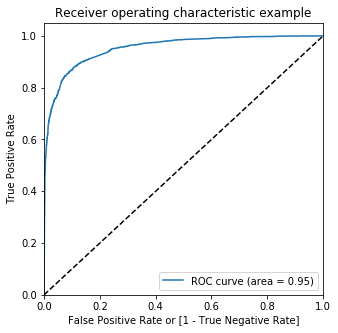

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding the optimal cut-off

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.354776,0,1,1,1,1,0,0,0,0,0,0
1,0,0.271566,0,1,1,1,0,0,0,0,0,0,0
2,0,0.507730,1,1,1,1,1,1,1,0,0,0,0
3,1,0.911094,1,1,1,1,1,1,1,1,1,1,1
4,0,0.023707,0,1,0,0,0,0,0,0,0,0,0


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.379667  1.000000  0.000000
0.1  0.1   0.768701  0.971335  0.644681
0.2  0.2   0.833586  0.942671  0.766822
0.3  0.3   0.884282  0.887155  0.882523
0.4  0.4   0.892960  0.855588  0.915834
0.5  0.5   0.894200  0.823657  0.937375
0.6  0.6   0.883455  0.759434  0.959360
0.7  0.7   0.877256  0.723875  0.971130
0.8  0.8   0.867750  0.682874  0.980902
0.9  0.9   0.837305  0.587446  0.990229


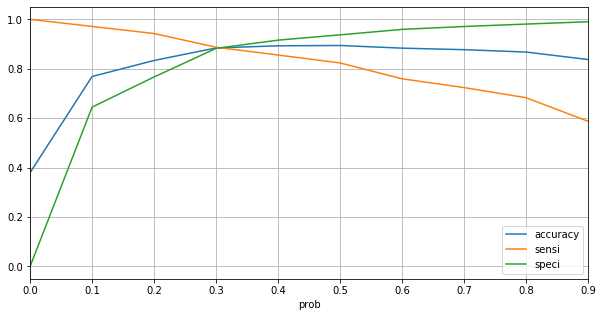

In [135]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

**From the curve above, 0.3 is the optimum point to take it as a cutoff probability.**

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.354776,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.271566,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.507730,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.911094,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.023707,0,1,0,0,0,0,0,0,0,0,0,0


In [137]:
# Let's check the overall accuracy.
trainaccuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
trainaccuracy

0.8842815814850531

In [138]:
# Let's create updated confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3974,  529],
       [ 311, 2445]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
# Let's see the sensitivity of our final model
trainsensi = TP / float(TP+FN)
trainsensi

0.887155297532656

In [141]:
# Let us calculate specificity
trainspeci = TN / float(TN+FP)
trainspeci

0.8825227626027093

In [142]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.1174772373972907


In [143]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8221250840618696


In [144]:
# Negative predictive value
print(TN / float(TN+ FN))

0.9274212368728121


### Precision and Recall

In [145]:
precision=precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.8894984326018809

In [146]:
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.8236574746008708

In [147]:
trainF1_score = 2 * (precision * recall) / (precision + recall)
trainF1_score

0.8553127354935947

## Precision and recall tradeoff

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

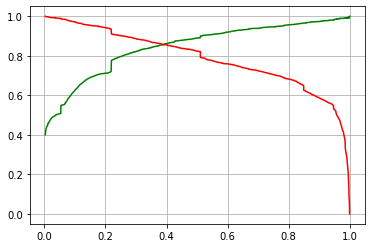

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(True)
plt.show()

## Making predictions on the test set

In [150]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 
                                                                       'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1461,0,0,0.661905,-0.760134,1.534715,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7926,0,0,0.300780,-0.462680,-0.515062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1909,0,0,0.661905,-0.099125,0.138409,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
8971,0,0,0.300780,2.370480,0.976193,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5310,0,0,0.300780,-0.705050,0.976193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [151]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Travel and Tourism,Tags_Others,Tags_Will revert after reading the email
1461,0,-0.760134,0,0,0,1,0,0,0,0,0
7926,0,-0.462680,0,0,0,1,0,0,0,1,0
1909,0,-0.099125,0,0,0,0,0,0,0,1,0
8971,0,2.370480,0,0,0,0,0,0,0,1,0
5310,0,-0.705050,0,0,0,0,0,1,0,0,0


In [152]:
X_test_sm = sm.add_constant(X_test)

In [153]:
# Making prediction on test set
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

1461    0.000582
7926    0.022803
1909    0.150116
8971    0.760212
5310    0.011349
4774    0.218531
2084    0.009782
6351    0.065331
335     0.997235
8202    0.013882
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
# Let's see the head of y_pred_final
y_pred_1.head()

,0
1461,0.000582
7926,0.022803
1909,0.150116
8971,0.760212
5310,0.011349


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
1461,0,0.000582
7926,0,0.022803
1909,0,0.150116
8971,1,0.760212
5310,0,0.011349


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_prob
1461,0,0.000582
7926,0,0.022803
1909,0,0.150116
8971,1,0.760212
5310,0,0.011349


In [160]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [161]:
y_pred_final.head()

,Converted,Converted_prob,final_predicted
1461,0,0.000582,0
7926,0,0.022803,0
1909,0,0.150116,0
8971,1,0.760212,1
5310,0,0.011349,0


In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.354776,0,1,1,1,1,0,0,0,0,0,0,1,35
1,0,0.271566,0,1,1,1,0,0,0,0,0,0,0,0,27
2,0,0.507730,1,1,1,1,1,1,1,0,0,0,0,1,51
3,1,0.911094,1,1,1,1,1,1,1,1,1,1,1,1,91
4,0,0.023707,0,1,0,0,0,0,0,0,0,0,0,0,2


In [163]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [164]:
y_pred_final['Lead_Score']=(y_pred_final['Converted_prob']*100).astype("int64")
y_pred_final.sort_values(by='Lead_Score',ascending=False).head(10)

,Converted,Converted_prob,final_predicted,Lead_Score
2296,1,0.997491,1,99
7814,1,0.992553,1,99
5571,1,0.997235,1,99
7496,1,0.997731,1,99
8521,1,0.991320,1,99
2519,1,0.997554,1,99
2011,1,0.999966,1,99
7978,1,0.992879,1,99
760,1,0.995077,1,99
5263,1,0.997849,1,99


In [165]:
Lead_Score=y_pred_final.copy()
Lead_Score.head()

,Converted,Converted_prob,final_predicted,Lead_Score
1461,0,0.000582,0,0
7926,0,0.022803,0,2
1909,0,0.150116,0,15
8971,1,0.760212,1,76
5310,0,0.011349,0,1


In [166]:
Lead_Score.reset_index(level=0, inplace=True)
Lead_Score.drop(['Converted', 'Converted_prob', 'final_predicted'], 1, inplace = True)
Lead_Score.head()

,index,Lead_Score
0,1461,0
1,7926,2
2,1909,15
3,8971,76
4,5310,1


In [167]:
Lead=lead_dup[['Prospect ID', 'Lead Number']].copy()
Lead.reset_index(level=0, inplace=True)
Lead.head()

,index,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [168]:
Lead_Score=pd.merge(Lead,Lead_Score,on='index')
Lead_Score.drop(['index'], 1, inplace = True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0
1,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,5
2,af465dfc-7204-4130-9e05-33231863c4b5,660616,7
3,8bf76a52-2478-476b-8618-1688e07874ad,660562,99
4,88867067-3750-4753-8d33-1c7d1db53b5e,660558,0


As per the business, they a model to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted

In [169]:
Lead_Score.sort_values(['Lead_Score'], ascending = False,inplace=True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
1814,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,99
307,63926df7-6111-4983-83d9-0ccf2cb5f66d,643546,99
330,12fcbd80-953e-40fb-aaf2-96f5ff7b2961,642612,99
1065,da1da914-737c-4e1f-b66f-d8771694068c,608261,99
1071,d5f11394-7eca-4edb-8979-665b101e0d56,608100,99


In [170]:
# Let's check the overall accuracy.
testaccuracy= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
testaccuracy

0.8793388429752066

In [171]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1016,  120],
       [  99,  580]], dtype=int64)

In [172]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [173]:
# Let's see the sensitivity of our lmodel
testsensi=TP / float(TP+FN)
testsensi

0.8541973490427098

In [174]:
# Let us calculate specificity
testspeci= TN / float(TN+FP)
testspeci

0.8943661971830986

In [175]:
precision=precision_score(y_pred_final.Converted , y_pred_final.final_predicted)
precision

0.8285714285714286

In [176]:
recall=recall_score(y_pred_final.Converted , y_pred_final.final_predicted)
recall

0.8541973490427098

In [177]:
testF1_score=2 * (precision * recall) / (precision + recall)
testF1_score

0.8411892675852066

## Final Outcome

From derived data insights we are able to design a good model to share Lead Score with sales team which will eventually help them to target hot leads & convert them into valuable customers. Table UI is made simple to make sure teams works efficenctly & improves the sales.

In [178]:
Lead_Score.head(20)

,Prospect ID,Lead Number,Lead_Score
1814,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,99
307,63926df7-6111-4983-83d9-0ccf2cb5f66d,643546,99
330,12fcbd80-953e-40fb-aaf2-96f5ff7b2961,642612,99
1065,da1da914-737c-4e1f-b66f-d8771694068c,608261,99
1071,d5f11394-7eca-4edb-8979-665b101e0d56,608100,99
317,d8ada66c-170f-41a9-b406-729a88b70778,643151,99
1096,4b77ad5c-95af-443b-9700-8874f26bda7a,607221,99
310,84bec27c-7b3e-4012-91e1-4aadb5a58c7a,643401,99
1112,623bc6c9-9184-4437-b38f-d374be49d1a3,606508,99
1050,396821ef-fd9e-4fec-862b-82c38b43c618,608709,99


## Model Evaluation Metrics

In [179]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensi*100),2)))
print("Train Data Specificity :{} %".format(round((trainspeci*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensi*100),2)))
print("Test Data Specificity  :{} %".format(round((testspeci*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))

Train Data Accuracy    :88.43 %
Train Data Sensitivity :88.72 %
Train Data Specificity :88.25 %
Train Data F1 Score    :0.86  
Test Data Accuracy     :87.93 %
Test Data Sensitivity  :85.42 %
Test Data Specificity  :89.44 %
Test Data F1 Score     :0.84  


In [180]:
# classification report of train data
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      4503
           1       0.82      0.89      0.85      2756

    accuracy                           0.88      7259
   macro avg       0.87      0.88      0.88      7259
weighted avg       0.89      0.88      0.89      7259



In [181]:
# classification report of test data
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1136
           1       0.83      0.85      0.84       679

    accuracy                           0.88      1815
   macro avg       0.87      0.87      0.87      1815
weighted avg       0.88      0.88      0.88      1815



### Top Features/Predictors

In [182]:
# Getting the parameters from final Model (Model 9)

pd.options.display.float_format = '{:.2f}'.format
final_parameters = res.params[1:]
final_parameters

Do Not Email                               -1.58
Total Time Spent on Website                1.17 
Lead Source_Olark Chat                     1.38 
Lead Source_Reference                      4.39 
Lead Source_Welingak Website               6.84 
Last Activity_Olark Chat Conversation      -1.60
Last Activity_Others                       1.88 
Last Activity_SMS Sent                     1.32 
Specialization_Travel and Tourism          -0.75
Tags_Others                                3.34 
Tags_Will revert after reading the email   7.50 
dtype: float64

In [183]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                               -21.10
Total Time Spent on Website                15.58 
Lead Source_Olark Chat                     18.46 
Lead Source_Reference                      58.48 
Lead Source_Welingak Website               91.12 
Last Activity_Olark Chat Conversation      -21.31
Last Activity_Others                       25.04 
Last Activity_SMS Sent                     17.57 
Specialization_Travel and Tourism          -9.97 
Tags_Others                                44.56 
Tags_Will revert after reading the email   100.00
dtype: float64

In [184]:
# Sorting the Predictor variables based on their relative coefficient values

top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Do Not Email                                5 
Total Time Spent on Website                 0 
Lead Source_Olark Chat                      8 
Lead Source_Reference                       1 
Lead Source_Welingak Website                7 
Last Activity_Olark Chat Conversation       2 
Last Activity_Others                        6 
Last Activity_SMS Sent                      9 
Specialization_Travel and Tourism           3 
Tags_Others                                 4 
Tags_Will revert after reading the email    10
dtype: int64

<Figure size 864x576 with 0 Axes>

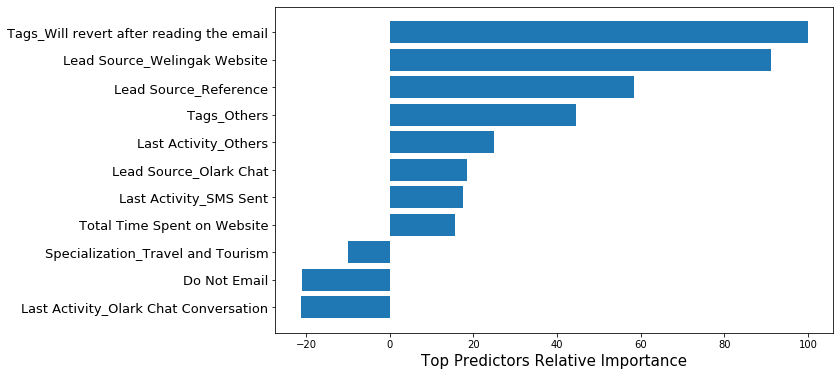

In [185]:
# Plotting the predictors based on their relative importance

%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

## Conlusion

- **~85% of Recall value indicates that our model is able to predict 85% of actual conversion cases correctly**
- **~83% of Precision value indicates that 83% of the conversions that our model predicted is actually converted**